In [1]:
import time, os
import pandas as pd
from subprocess import Popen, PIPE
from math import floor
import numpy as np

exe_7z = r"C:\Program Files\7-Zip\7z.exe"
original = r"V:\GIS\SatelliteImagery_20230410\compression example\Original.tar"
odir = r"V:\GIS\SatelliteImagery_20230410\compression example"
levels = {0: "Store", 1: "Fastest", 3: "Fast", 5: "Normal", 7: "Maximum", 9: "Ultra"}
algorithms = {"bzip2": ".bz2", "gzip": ".gz", "xz": ".xz", "zip": ".zip", "7z": ".7z"}

In [2]:
columns = ["file", "algorithm", "level", "start", "end", "elapsed"]
coltypes = [str, str, str, float, float, float]
coltypestr = [str(x) for x in coltypes]

typed_cols = {'file': pd.Series(dtype=str), 
              'algorithm': pd.Series(dtype=str), 
              'level': pd.Series(dtype=str), 
              'start': pd.Series(dtype=float), 
              'end': pd.Series(dtype=float), 
              'elapsed': pd.Series(dtype=float)}
print(typed_cols)

df = pd.DataFrame(typed_cols)

{'file': Series([], dtype: object), 'algorithm': Series([], dtype: object), 'level': Series([], dtype: object), 'start': Series([], dtype: float64), 'end': Series([], dtype: float64), 'elapsed': Series([], dtype: float64)}


In [3]:
current_start_time = floor(time.time())
os.mkdir(odir + os.sep + str(current_start_time))
for level in levels.keys():
    for alg in algorithms.keys():
        print("#" * 80)
        outname = f"{odir}{os.sep}{current_start_time}{os.sep}{levels[level]}_{alg}.tar{algorithms[alg]}"
        print(outname)
        command = [exe_7z, "a", f"-t{alg}", f"-mx{level}", "-bb3", outname, original]
        start = time.time()
        sp = Popen(command, stdout=PIPE, stderr=PIPE)
        stdout, stderr = sp.communicate()
        print("Standard Output:")
        print(stdout.decode('utf-8'))
        print("Errors")
        print(stderr.decode('utf-8'))
        end = time.time()
        print(end-start)
        dfrow = [outname, alg, level, start, end, end-start]
        print({x:y for x, y in zip(columns, dfrow)})
        df = df.append({x:y for x, y in zip(columns, dfrow)}, ignore_index=True)
        #print(df)
        print("\n\n")

################################################################################
V:\GIS\SatelliteImagery_20230410\compression example\1681909532\Store_bzip2.tar.bz2
Standard Output:

7-Zip 19.00 (x64) : Copyright (c) 1999-2018 Igor Pavlov : 2019-02-21

Scanning the drive:
1 file, 1268695040 bytes (1210 MiB)

Creating archive: V:\GIS\SatelliteImagery_20230410\compression example\1681909532\Store_bzip2.tar.bz2

Add new data to archive: 1 file, 1268695040 bytes (1210 MiB)

+ Original.tar

Files read from disk: 1
Archive size: 1274965929 bytes (1216 MiB)
Everything is Ok

Errors

14.698474168777466
{'file': 'V:\\GIS\\SatelliteImagery_20230410\\compression example\\1681909532\\Store_bzip2.tar.bz2', 'algorithm': 'bzip2', 'level': 0, 'start': 1681909532.0208716, 'end': 1681909546.7193458, 'elapsed': 14.698474168777466}



################################################################################
V:\GIS\SatelliteImagery_20230410\compression example\1681909532\Store_gzip.tar.gz
Standard O

Standard Output:

7-Zip 19.00 (x64) : Copyright (c) 1999-2018 Igor Pavlov : 2019-02-21

Scanning the drive:
1 file, 1268695040 bytes (1210 MiB)

Creating archive: V:\GIS\SatelliteImagery_20230410\compression example\1681909532\Fast_bzip2.tar.bz2

Add new data to archive: 1 file, 1268695040 bytes (1210 MiB)

+ Original.tar

Files read from disk: 1
Archive size: 1271652278 bytes (1213 MiB)
Everything is Ok

Errors

14.9161958694458
{'file': 'V:\\GIS\\SatelliteImagery_20230410\\compression example\\1681909532\\Fast_bzip2.tar.bz2', 'algorithm': 'bzip2', 'level': 3, 'start': 1681909663.0202556, 'end': 1681909677.9364514, 'elapsed': 14.9161958694458}



################################################################################
V:\GIS\SatelliteImagery_20230410\compression example\1681909532\Fast_gzip.tar.gz
Standard Output:

7-Zip 19.00 (x64) : Copyright (c) 1999-2018 Igor Pavlov : 2019-02-21

Scanning the drive:
1 file, 1268695040 bytes (1210 MiB)

Creating archive: V:\GIS\SatelliteIma

Standard Output:

7-Zip 19.00 (x64) : Copyright (c) 1999-2018 Igor Pavlov : 2019-02-21

Scanning the drive:
1 file, 1268695040 bytes (1210 MiB)

Creating archive: V:\GIS\SatelliteImagery_20230410\compression example\1681909532\Maximum_gzip.tar.gz

Add new data to archive: 1 file, 1268695040 bytes (1210 MiB)

+ Original.tar

Files read from disk: 1
Archive size: 1265709474 bytes (1208 MiB)
Everything is Ok

Errors

76.72180151939392
{'file': 'V:\\GIS\\SatelliteImagery_20230410\\compression example\\1681909532\\Maximum_gzip.tar.gz', 'algorithm': 'gzip', 'level': 7, 'start': 1681910005.0379105, 'end': 1681910081.759712, 'elapsed': 76.72180151939392}



################################################################################
V:\GIS\SatelliteImagery_20230410\compression example\1681909532\Maximum_xz.tar.xz
Standard Output:

7-Zip 19.00 (x64) : Copyright (c) 1999-2018 Igor Pavlov : 2019-02-21

Scanning the drive:
1 file, 1268695040 bytes (1210 MiB)

Creating archive: V:\GIS\Satellite

In [6]:
df["filesize"] = [os.path.getsize(x) for x in df["file"]]
ofs = os.path.getsize(original)
df["filesavings"] = [x - ofs for x in df["filesize"]]

In [12]:
ofp = r"V:\GIS\SatelliteImagery_20230410\compression example\compression_results.pickle"
df.to_pickle(ofp)

{'bzip2': '1', 'gzip': '+', 'xz': '_', 'zip': 'x', '7z': '|'}
{0: 'g', 1: 'r', 3: 'm', 5: 'c', 7: 'b', 9: 'y'}


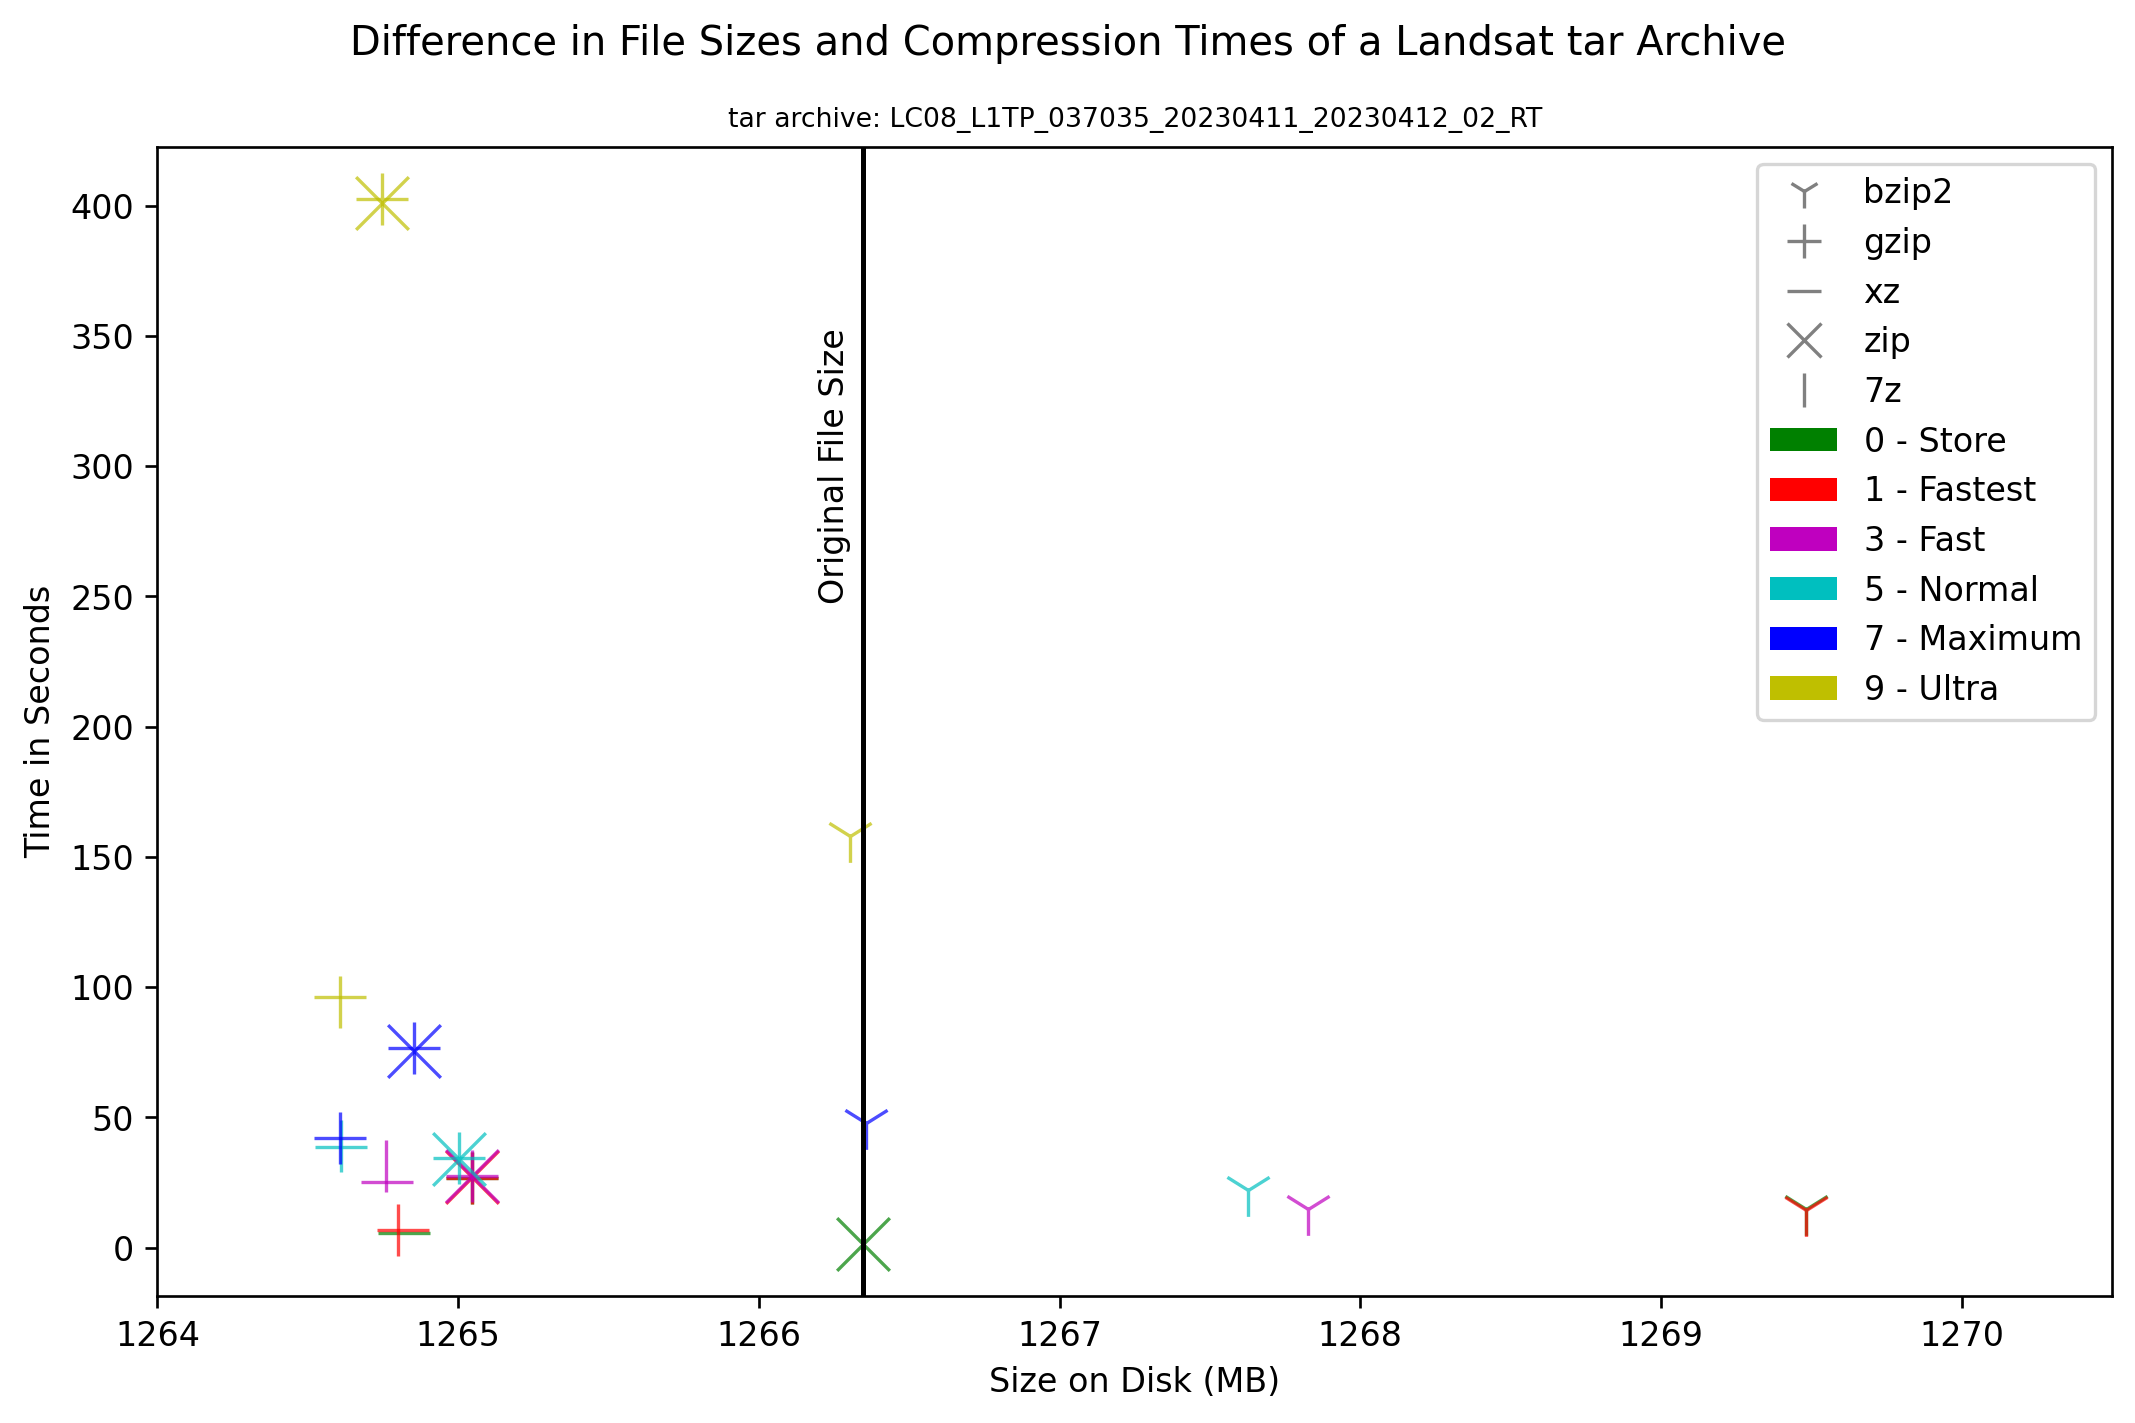

In [112]:
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from random import choice as rc

#markers = list("o^sp*h+xd")
markers = list("+x|_1")
colors = mcolors.BASE_COLORS

def assignments(source_obj, list_options):
    o_dict = {}
    used = ["w", "k"]
    for i in source_obj.keys():
        cc = rc([x for x in list_options if x not in used])
        used.append(cc)
        o_dict[i] = cc
    return(o_dict)

marks = assignments(algorithms, markers)
colrs = assignments(levels, colors)
print(marks)
print(colrs)

legend_items = []
for mark in marks.keys():
    legend_items.append(Line2D([], [], marker=marks[mark], ms=10, label=f"{mark}", linestyle="None", mfc="black", mew=1, mec="grey"))
for colr in colrs.keys():
    legend_items.append(Patch(facecolor=colrs[colr], label=f"{colr} - {levels[colr]}"))

df2 = df[["algorithm", "level", "elapsed", "filesize"]]
df2["marker"] = [marks[x] for x in df2["algorithm"]]
df2["color"] = [colrs[x] for x in df2["level"]]
df2["filesize_MB"] = [x/1_000_000 for x in df2["filesize"]]
# print(df2)

ofs_MB = ofs/1_000_000

fig, ax = plt.subplots(figsize=(9,6), dpi=240)
ax.axvline(ofs_MB, c="black")
[ax.scatter(x=x, y=y, c=c, marker=m, s=250, alpha=0.7, linewidths=1) for x,y,c,m in zip(df2["filesize_MB"], df2["elapsed"], df2["color"], df2["marker"])]
ax.set_xlabel("Size on Disk (MB)")
ax.set_ylabel("Time in Seconds")
ax.set_title("tar archive: LC08_L1TP_037035_20230411_20230412_02_RT", fontsize=8)
ax.legend(handles=legend_items, loc="upper right")
ax.text(ofs_MB-0.3, 250, "Original File Size", rotation=90)
ax.set_xlim(1264, 1277)
ax.set_xticklabels([x for x in range(1264, 1277)])

fig.suptitle("Difference in File Sizes and Compression Times of a Landsat tar Archive")
fig.tight_layout()